In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/Users/deepthitamma/Desktop/FFR_Data2.csv")

In [4]:
df.head(5)

,PatientID,PrimaryKey,ResponseUnitID,TransportUnitID,Location of the Incident,IncidentFirstDue,FinalIncidentType,UnitPrimaryActionTaken,UnitType,CallConfirmedDT,...,PrimaryImpression,LevelOfCare,Same Record,Time taken,Time taken (min),Time(compliancy),Hospital Compliancy,LOC Compliancy,Time RT,Compliancy
0,640838,9.804015e+09,M401,M401,McLean,401.0,ALS,Provide advanced life support (ALS),Medic,7/1/18 2:16,...,GastroIntestinal Tract,Level 3: 1 Provider (ALS Care),1,0:19,19,1,1,1,0:50,1
1,641032,9.804016e+09,M401,M401,McLean,401.0,BLS,Provide advanced life support (ALS),Medic,7/1/18 11:20,...,ENT issue,Level 4: 1 Provider (BLS Care),1,0:11,11,1,1,1,0:35,1
2,641839,9.804019e+09,M401,M401,McLean,401.0,BLS,Provide advanced life support (ALS),Medic,7/2/18 9:31,...,Injured at the incident,Level 4: 1 Provider (BLS Care),1,0:14,14,1,1,1,0:37,1
3,641959,9.804019e+09,M401,M401,McLean,401.0,BLS,Transport person,Medic,7/2/18 11:19,...,Injured at the incident,Level 4: 1 Provider (BLS Care),1,0:27,27,1,1,1,0:49,1
4,642086,9.804019e+09,M401,M401,McLean,401.0,ALS,Transport person,Medic,7/2/18 13:56,...,Neuro issue,Level 3: 1 Provider (ALS Care),1,0:12,12,1,1,1,0:37,1


In [5]:
df.corr()

,PatientID,PrimaryKey,IncidentFirstDue,UnitStation,TransportHospitalCode,Same Record,Time taken (min),Time(compliancy),Hospital Compliancy,LOC Compliancy,Compliancy
PatientID,1.000000,0.983964,-0.003447,-0.002758,0.024057,NaN,-0.034203,0.003015,-0.010061,-0.019277,-0.021500
PrimaryKey,0.983964,1.000000,-0.003266,-0.002335,0.023688,NaN,-0.033236,0.002915,-0.010189,-0.019293,-0.021588
IncidentFirstDue,-0.003447,-0.003266,1.000000,0.701937,0.059028,NaN,0.071888,0.000079,-0.015870,-0.005894,-0.014552
UnitStation,-0.002758,-0.002335,0.701937,1.000000,0.084361,NaN,0.069876,-0.003995,-0.028019,-0.007951,-0.023753
TransportHospitalCode,0.024057,0.023688,0.059028,0.084361,1.000000,NaN,-0.080993,-0.024470,0.000652,0.010373,0.006623
Same Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time taken (min),-0.034203,-0.033236,0.071888,0.069876,-0.080993,NaN,1.000000,0.004781,-0.072809,0.024763,-0.026662
Time(compliancy),0.003015,0.002915,0.000079,-0.003995,-0.024470,NaN,0.004781,1.000000,0.000402,-0.001101,0.056717
Hospital Compliancy,-0.010061,-0.010189,-0.015870,-0.028019,0.000652,NaN,-0.072809,0.000402,1.000000,0.018860,0.631535
LOC Compliancy,-0.019277,-0.019293,-0.005894,-0.007951,0.010373,NaN,0.024763,-0.001101,0.018860,1.000000,0.762831


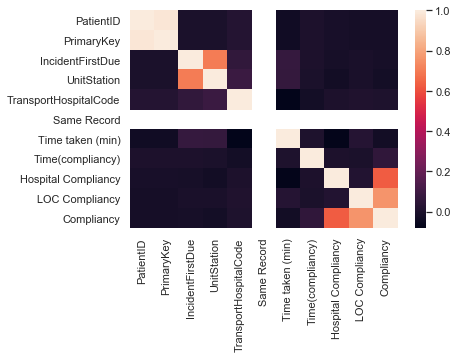

In [6]:
sns.heatmap(df.corr());

In [7]:
del df['Same Record']

In [8]:
del df['Time(compliancy)']

In [9]:
df.rename(columns = {'LOC Compliancy':'LOC_Compliancy'}, inplace = True)

In [10]:
df.rename(columns = {'Hospital Compliancy':'Hospital_Compliancy'}, inplace = True)

In [11]:
df.head(5)

,PatientID,PrimaryKey,ResponseUnitID,TransportUnitID,Location of the Incident,IncidentFirstDue,FinalIncidentType,UnitPrimaryActionTaken,UnitType,CallConfirmedDT,...,TransportHospitalName,PatientAge,PrimaryImpression,LevelOfCare,Time taken,Time taken (min),Hospital_Compliancy,LOC_Compliancy,Time RT,Compliancy
0,640838,9.804015e+09,M401,M401,McLean,401.0,ALS,Provide advanced life support (ALS),Medic,7/1/18 2:16,...,Virginia Hospital Center,80 - 89,GastroIntestinal Tract,Level 3: 1 Provider (ALS Care),0:19,19,1,1,0:50,1
1,641032,9.804016e+09,M401,M401,McLean,401.0,BLS,Provide advanced life support (ALS),Medic,7/1/18 11:20,...,Virginia Hospital Center,80 - 89,ENT issue,Level 4: 1 Provider (BLS Care),0:11,11,1,1,0:35,1
2,641839,9.804019e+09,M401,M401,McLean,401.0,BLS,Provide advanced life support (ALS),Medic,7/2/18 9:31,...,Inova Fairfax Hospital Falls Church,40 - 49,Injured at the incident,Level 4: 1 Provider (BLS Care),0:14,14,1,1,0:37,1
3,641959,9.804019e+09,M401,M401,McLean,401.0,BLS,Transport person,Medic,7/2/18 11:19,...,Virginia Hospital Center,80 - 89,Injured at the incident,Level 4: 1 Provider (BLS Care),0:27,27,1,1,0:49,1
4,642086,9.804019e+09,M401,M401,McLean,401.0,ALS,Transport person,Medic,7/2/18 13:56,...,Virginia Hospital Center,20 - 29,Neuro issue,Level 3: 1 Provider (ALS Care),0:12,12,1,1,0:37,1


In [12]:
df.columns

Index(['PatientID', 'PrimaryKey', 'ResponseUnitID', 'TransportUnitID',
       'Location of the Incident', 'IncidentFirstDue', 'FinalIncidentType',
       'UnitPrimaryActionTaken', 'UnitType', 'CallConfirmedDT',
       'UnitTransportedDT', 'UnitTransportedArrivalDT', 'UnitStation',
       'ShiftDay', 'ReasonForChoosing', 'TransportHospitalCode',
       'TransportHospitalName', 'PatientAge', 'PrimaryImpression',
       'LevelOfCare', 'Time taken', 'Time taken (min)', 'Hospital_Compliancy',
       'LOC_Compliancy', 'Time RT', 'Compliancy'],
      dtype='object')

In [13]:
df.corr()

,PatientID,PrimaryKey,IncidentFirstDue,UnitStation,TransportHospitalCode,Time taken (min),Hospital_Compliancy,LOC_Compliancy,Compliancy
PatientID,1.000000,0.983964,-0.003447,-0.002758,0.024057,-0.034203,-0.010061,-0.019277,-0.021500
PrimaryKey,0.983964,1.000000,-0.003266,-0.002335,0.023688,-0.033236,-0.010189,-0.019293,-0.021588
IncidentFirstDue,-0.003447,-0.003266,1.000000,0.701937,0.059028,0.071888,-0.015870,-0.005894,-0.014552
UnitStation,-0.002758,-0.002335,0.701937,1.000000,0.084361,0.069876,-0.028019,-0.007951,-0.023753
TransportHospitalCode,0.024057,0.023688,0.059028,0.084361,1.000000,-0.080993,0.000652,0.010373,0.006623
Time taken (min),-0.034203,-0.033236,0.071888,0.069876,-0.080993,1.000000,-0.072809,0.024763,-0.026662
Hospital_Compliancy,-0.010061,-0.010189,-0.015870,-0.028019,0.000652,-0.072809,1.000000,0.018860,0.631535
LOC_Compliancy,-0.019277,-0.019293,-0.005894,-0.007951,0.010373,0.024763,0.018860,1.000000,0.762831
Compliancy,-0.021500,-0.021588,-0.014552,-0.023753,0.006623,-0.026662,0.631535,0.762831,1.000000


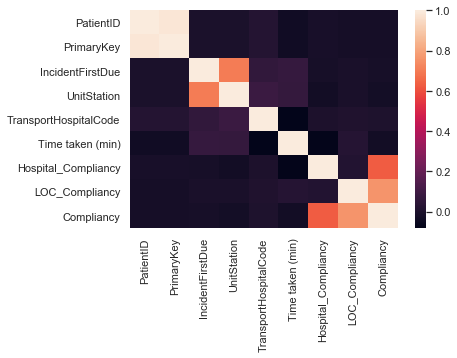

In [14]:
sns.heatmap(df.corr());

In [15]:
df['LOC_Compliancy'].value_counts()

1    113676
0      7311
Name: LOC_Compliancy, dtype: int64

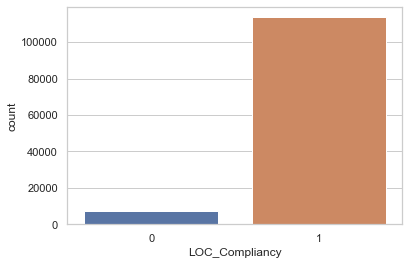

<Figure size 432x288 with 0 Axes>

In [16]:
sns.countplot(x = 'LOC_Compliancy', data = df)
plt.show()
plt.savefig('count_plot')

In [17]:
count_non_compliant = len(df[df['LOC_Compliancy']==0])
count_compliant = len(df[df['LOC_Compliancy']==1])
pct_of_non_compliant = count_compliant/(count_compliant+count_non_compliant)
print("percentage of count compliant is", pct_of_non_compliant*100)
pct_of_compliant = count_non_compliant/(count_compliant+count_non_compliant)
print("percentage of non compliant", pct_of_compliant*100)

percentage of count compliant is 93.95720201343946
percentage of non compliant 6.042797986560539


In [18]:
df.groupby('LOC_Compliancy').mean()

,PatientID,PrimaryKey,IncidentFirstDue,UnitStation,TransportHospitalCode,Time taken (min),Hospital_Compliancy,Compliancy
LOC_Compliancy,,,,,,,,
0,1.055869e+06,1.116486e+10,420.445083,20.520312,42.511558,11.462727,0.942826,0.000000
1,1.037254e+06,1.110422e+10,420.169547,20.147912,45.128382,12.158820,0.958742,0.958391


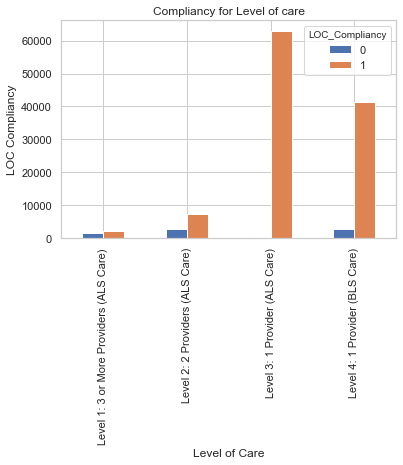

In [19]:
%matplotlib inline
pd.crosstab(df.LevelOfCare,df.LOC_Compliancy).plot(kind='bar')
plt.title('Compliancy for Level of care')
plt.xlabel('Level of Care')
plt.ylabel('LOC Compliancy')
plt.savefig('Compliancy with LOC')

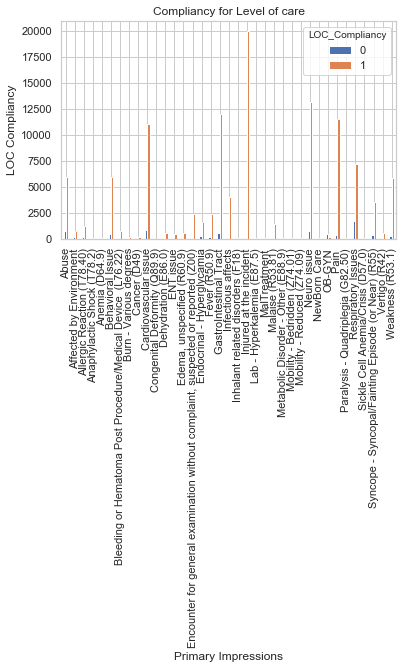

In [20]:
%matplotlib inline
pd.crosstab(df.PrimaryImpression,df.LOC_Compliancy).plot(kind='bar')
plt.title('Compliancy for Level of care')
plt.xlabel('Primary Impressions')
plt.ylabel('LOC Compliancy')
plt.savefig('Compliancy with Primary Impression')

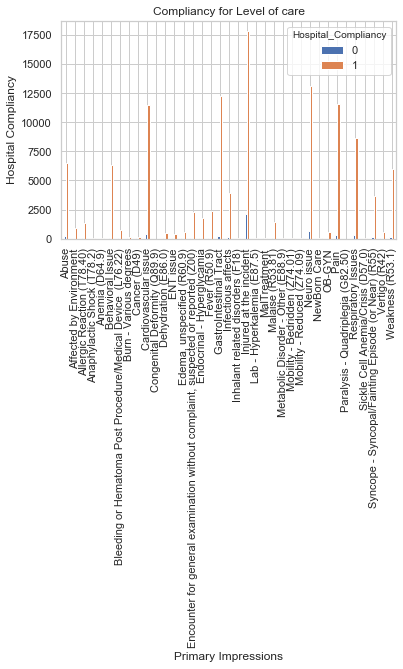

In [21]:
%matplotlib inline
pd.crosstab(df.PrimaryImpression,df.Hospital_Compliancy).plot(kind='bar')
plt.title('Compliancy for Level of care')
plt.xlabel('Primary Impressions')
plt.ylabel('Hospital Compliancy')
plt.savefig('Compliancy with Primary Impression')

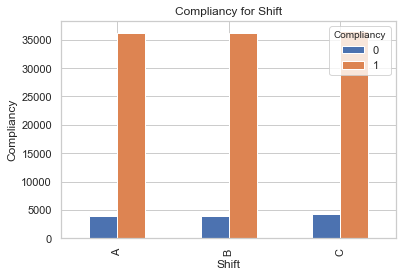

In [22]:
%matplotlib inline
pd.crosstab(df.ShiftDay,df.Compliancy).plot(kind='bar')
plt.title('Compliancy for Shift')
plt.xlabel('Shift')
plt.ylabel('Compliancy')
plt.savefig('Compliancy with Shift')

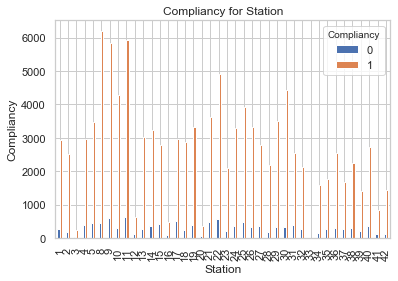

In [23]:
%matplotlib inline
pd.crosstab(df.UnitStation,df.Compliancy).plot(kind='bar')
plt.title('Compliancy for Station')
plt.xlabel('Station')
plt.ylabel('Compliancy')
plt.savefig('Compliancy with Stataion')

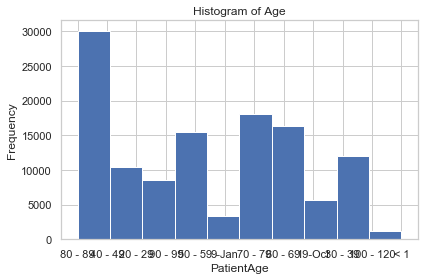

In [24]:
df.PatientAge.hist()
plt.title('Histogram of Age')
plt.xlabel('PatientAge')
plt.ylabel('Frequency')
plt.savefig('hist_age')
plt.tight_layout()

In [25]:
df.columns

Index(['PatientID', 'PrimaryKey', 'ResponseUnitID', 'TransportUnitID',
       'Location of the Incident', 'IncidentFirstDue', 'FinalIncidentType',
       'UnitPrimaryActionTaken', 'UnitType', 'CallConfirmedDT',
       'UnitTransportedDT', 'UnitTransportedArrivalDT', 'UnitStation',
       'ShiftDay', 'ReasonForChoosing', 'TransportHospitalCode',
       'TransportHospitalName', 'PatientAge', 'PrimaryImpression',
       'LevelOfCare', 'Time taken', 'Time taken (min)', 'Hospital_Compliancy',
       'LOC_Compliancy', 'Time RT', 'Compliancy'],
      dtype='object')

In [26]:
df.dtypes

PatientID                     int64
PrimaryKey                  float64
ResponseUnitID               object
TransportUnitID              object
Location of the Incident     object
IncidentFirstDue            float64
FinalIncidentType            object
UnitPrimaryActionTaken       object
UnitType                     object
CallConfirmedDT              object
UnitTransportedDT            object
UnitTransportedArrivalDT     object
UnitStation                   int64
ShiftDay                     object
ReasonForChoosing            object
TransportHospitalCode         int64
TransportHospitalName        object
PatientAge                   object
PrimaryImpression            object
LevelOfCare                  object
Time taken                   object
Time taken (min)              int64
Hospital_Compliancy           int64
LOC_Compliancy                int64
Time RT                      object
Compliancy                    int64
dtype: object

In [27]:
PrimaryImpression_Onehot = pd.get_dummies(df.PrimaryImpression, prefix='Primary Impression')

In [28]:
LOC_Onehot = pd.get_dummies(df.LevelOfCare, prefix='Level Of Care')

In [29]:
x = pd.concat([PrimaryImpression_Onehot, LOC_Onehot], axis=1)

In [30]:
y = pd.to_numeric(df['LOC_Compliancy'])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [33]:
len(X_train)

84690

In [34]:
len(X_test)

36297

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_reg = LogisticRegression()

In [37]:
log_reg.fit(X_train,y_train)

/Users/deepthitamma/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = log_reg.predict(X_test)

In [39]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
total_correct = sum(y_pred == y_test)

In [41]:
len(y_test)

36297

In [42]:
accuracy = total_correct/len(y_test)
print(accuracy)

0.9345124941455216


In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/deepthitamma/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  455  1807]
 [  570 33465]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.20      0.28      2262
           1       0.95      0.98      0.97     34035

    accuracy                           0.93     36297
   macro avg       0.70      0.59      0.62     36297
weighted avg       0.92      0.93      0.92     36297



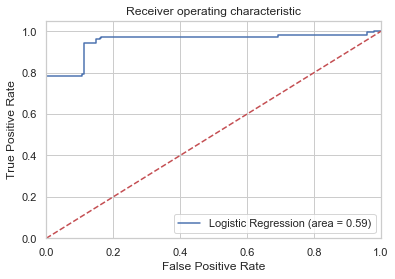

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
TransportHospitalName_Onehot = pd.get_dummies(df.TransportHospitalName, prefix='Transport Hospital Name')

In [51]:
X=pd.concat([PrimaryImpression_Onehot, TransportHospitalName_Onehot], axis=1)

In [52]:
y = pd.to_numeric(df['Hospital_Compliancy'])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [57]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [58]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
y_pred=model.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [64]:
from sklearn import metrics

In [65]:
rf_probs = model.predict_proba(X_test)[:, 1]

In [66]:
rf_probs

array([0.98937127, 0.96159673, 0.98381211, ..., 0.95508221, 0.94687121,
       0.96490313])

In [70]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

In [71]:
roc_value

0.7581982160259766

In [78]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.96


In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[   61  1424]
 [   44 34768]]
              precision    recall  f1-score   support

           0       0.58      0.04      0.08      1485
           1       0.96      1.00      0.98     34812

    accuracy                           0.96     36297
   macro avg       0.77      0.52      0.53     36297
weighted avg       0.95      0.96      0.94     36297

0.9595558861613908
